In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper.lorenz import my_lorenz
from helper.visualization import plot_lorenz_attractor

In [2]:

def get_initial_points(sigma=10, rho=22, beta=8/3, var1min=-20, var1max=20, var1count=10, var2min=-10, var2max=70, var2count=10):

    u_vals = np.linspace(var1min,var1max,var1count)
    v_vals = np.linspace(var2min,var2max,var2count)
   
    # Initial conditions on the x=0 plane

    initial_conditions_x = [[0, y, z] for y in u_vals for z in v_vals]

    # Initial Conditions on the y=0 plane
    initial_conditions_y = [[x, 0, z] for x in u_vals for z in v_vals]

    # Initial Conditions on the fixed points
    fixed_points = [(np.sqrt(beta * (rho - 1)), np.sqrt(beta * (rho - 1)), rho - 1),
                    (-np.sqrt(beta * (rho - 1)), -np.sqrt(beta * (rho - 1)), rho - 1)]

    initial_conditions_f = [[u_vals[i]*fixed_points[0][0] + v_vals[j]*fixed_points[1][0],
            u_vals[i]*fixed_points[0][1] + v_vals[j]*fixed_points[1][1],
            u_vals[i]*fixed_points[0][2] + v_vals[j]*fixed_points[1][2]] for i in range(len(u_vals)) for j in range(len(v_vals))]
        
    return initial_conditions_x, initial_conditions_y, initial_conditions_f

In [3]:
def fixed_point_analysis(rho=22, t_end=50, plane=1, var1min=-20, var1max=20, var1count=10, var2min=-10, var2max=70, var2count=10):

    sigma, beta  = 10, 8/3

    initial_conditions = get_initial_points(sigma, rho, beta, 
                                            var1min, var1max, var1count, 
                                            var2min, var2max, var2count)[plane-1]

    # Initial Conditions on the fixed points
    fixed_points = [(np.sqrt(beta * (rho - 1)), np.sqrt(beta * (rho - 1)), rho - 1),
                    (-np.sqrt(beta * (rho - 1)), -np.sqrt(beta * (rho - 1)), rho - 1)]

    # Solve for all initial conditions and classify trajectories
    trajectories = []
    classifications = []
    threshold = 1  # Distance threshold for classification

    for init in initial_conditions:
        # Solve the Lorenz system for the initial condition
        sol = my_lorenz(sigma=sigma, beta=beta, rho=rho, x0=init, t_end=t_end)
        final_state = sol[-1]

        # Classify the final state based on proximity to fixed points
        if np.linalg.norm(final_state - np.array(fixed_points[0])) < threshold:
            classification = "Fixed Point #1"
        elif np.linalg.norm(final_state - np.array(fixed_points[1])) < threshold:
            classification = "Fixed Point #2"
        else:
            classification = "Butterfly Attractor"

        trajectories.append(sol)
        classifications.append(classification)

    # Plot the initial conditions with classifications
    for init, classification in zip(initial_conditions, classifications):
        # Assign colors based on classification
        if classification == "Fixed Point #1": color = 'r'
        elif classification == "Fixed Point #2": color = 'g'
        else:
            print(init)
            color = 'black'

        plt.plot(init[1], init[2], marker='o', markersize=5, color=color)

    # Set plot labels and title
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.title('Initial Conditions')
    plt.grid(True)
    plt.show()

    # Print legend and range information
    print("LEGEND \n RED -- Fixed Point #1 \n GREEN -- Fixed Point #2 \n BLUE -- Butterfly")
    print()
    print(f"VAR1 MIN: {var1min}, VAR1 MAX: {var1max}, VAR1 COUNT: {var1count}")
    print(f"VAR2 MIN: {var2min}, VAR2 MAX: {var2max}, VAR2 COUNT: {var2count}")

In [4]:
rho = 24  # Given rho value
sigma = 10
beta = 8/3

t_end = 200
t_span = (0, t_end)  # Time span for evolution
t_eval = np.linspace(*t_span, t_end*100)  # Time points

In [5]:
# plane = 1; x = 0 plane; -20, 20, 10; -10, 70, 10
# plane = 2; y = 0 plane; -20, 20, 10; 0, 40, 50
# plane = 3; fixed points plane; 0, 2, .1; 0, 2, .1

var1min, var1max, var1count, var2min, var2max, var2count = -1,1,20,-1,1,20

In [6]:
fixed_point_analysis(rho = rho, t_end=t_end, plane=3, 
                     var1min=var1min, var1max=var1max, var1count=var1count, 
                     var2min=var2min, var2max=var2max, var2count=var2count)

KeyboardInterrupt: 

In [35]:
def get_initial_points_uv(sigma=10, rho=22, beta=8/3, umin=-1, umax=1, ucount=20, vmin=-1, vmax=1, vcount=20):
    u_vals = np.linspace(umin, umax, ucount)
    v_vals = np.linspace(vmin, vmax, vcount)
    fixed_points = [
        (np.sqrt(beta * (rho - 1)), np.sqrt(beta * (rho - 1)), rho - 1),
        (-np.sqrt(beta * (rho - 1)), -np.sqrt(beta * (rho - 1)), rho - 1)
    ]
    initial_conditions = []
    uv_coords = []
    for i, u in enumerate(u_vals):
        for j, v in enumerate(v_vals):
            x = u * fixed_points[0][0] + v * fixed_points[1][0]
            y = u * fixed_points[0][1] + v * fixed_points[1][1]
            z = u * fixed_points[0][2] + v * fixed_points[1][2]
            initial_conditions.append([x, y, z])
            uv_coords.append([u, v])
    return np.array(initial_conditions), np.array(uv_coords)

def plot_uv_axes(rho=22, t_end=50, umin=-1, umax=1, ucount=20, vmin=-1, vmax=1, vcount=20):
    sigma, beta = 10, 8/3
    initial_conditions, uv_coords = get_initial_points_uv(sigma, rho, beta, umin, umax, ucount, vmin, vmax, vcount)
    fixed_points = [
        (np.sqrt(beta * (rho - 1)), np.sqrt(beta * (rho - 1)), rho - 1),
        (-np.sqrt(beta * (rho - 1)), -np.sqrt(beta * (rho - 1)), rho - 1)
    ]
    threshold = 1
    for idx, init in enumerate(initial_conditions):
        u, v = uv_coords[idx]
        sol = my_lorenz(sigma=sigma, beta=beta, rho=rho, x0=init, t_end=t_end)
        final_state = sol[-1]
        if np.linalg.norm(final_state - np.array(fixed_points[0])) < threshold:
            color = 'r'
        elif np.linalg.norm(final_state - np.array(fixed_points[1])) < threshold:
            color = 'b'
        else:
            color = 'black'
        plt.plot(u, v, marker='o', markersize=5, color=color)
    plt.xlabel('u')
    plt.ylabel('v')
    plt.title('Initial Conditions (u-v axes)')
    plt.grid(True)
    plt.show()
    print("LEGEND \n RED -- Fixed Point #1 \n BLUE -- Fixed Point #2 \n BLACK -- Butterfly")
    print(f"u: {umin} to {umax}, v: {vmin} to {vmax}")

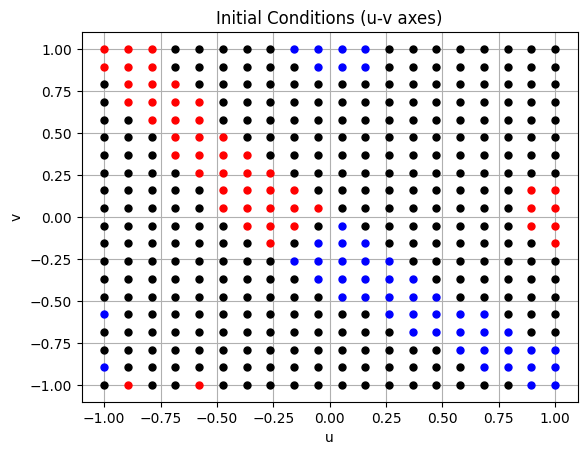

LEGEND 
 RED -- Fixed Point #1 
 BLUE -- Fixed Point #2 
 BLACK -- Butterfly
u: -1 to 1, v: -1 to 1


In [36]:
plot_uv_axes(rho = rho, t_end=t_end,
             umin=var1min, umax=var1max, ucount=var1count,
             vmin=var2min, vmax=var2max, vcount=var2count)

## Plot Specific Points

graphs change in different runs

In [17]:
x0= [40, 40, 0]
data = my_lorenz(sigma, beta, rho, x0=x0, t_end=200)


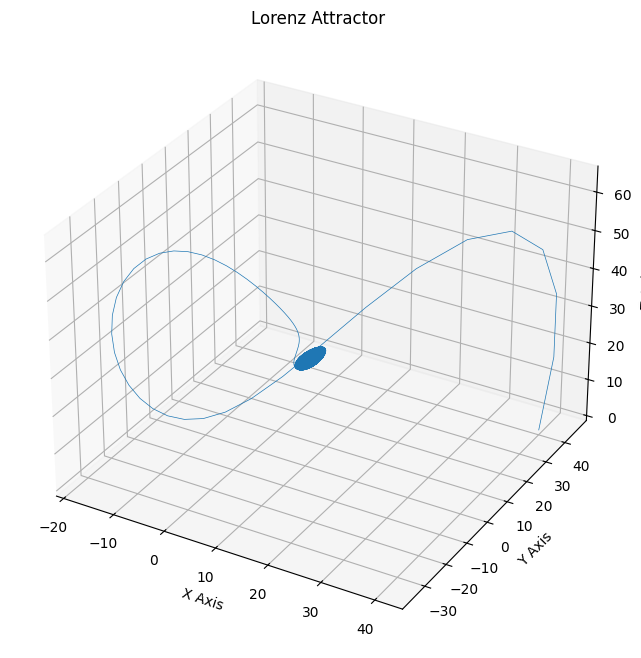

In [18]:
plot_lorenz_attractor(data,verbose=False)